In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('measures_v2.csv')
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


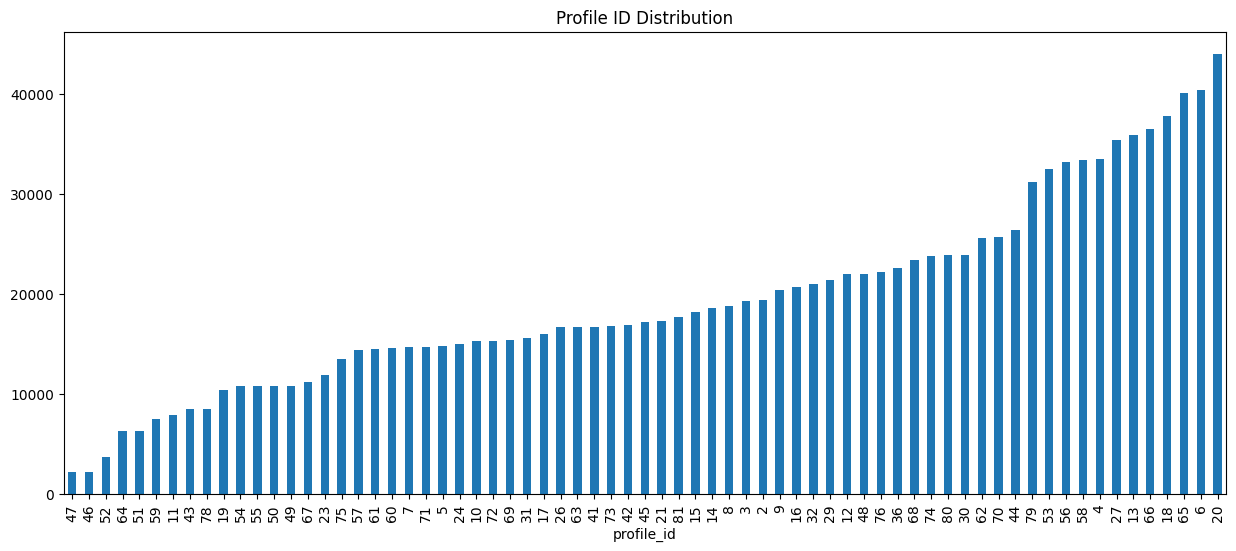

In [5]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind='bar')
plt.title("Profile ID Distribution")
plt.show()

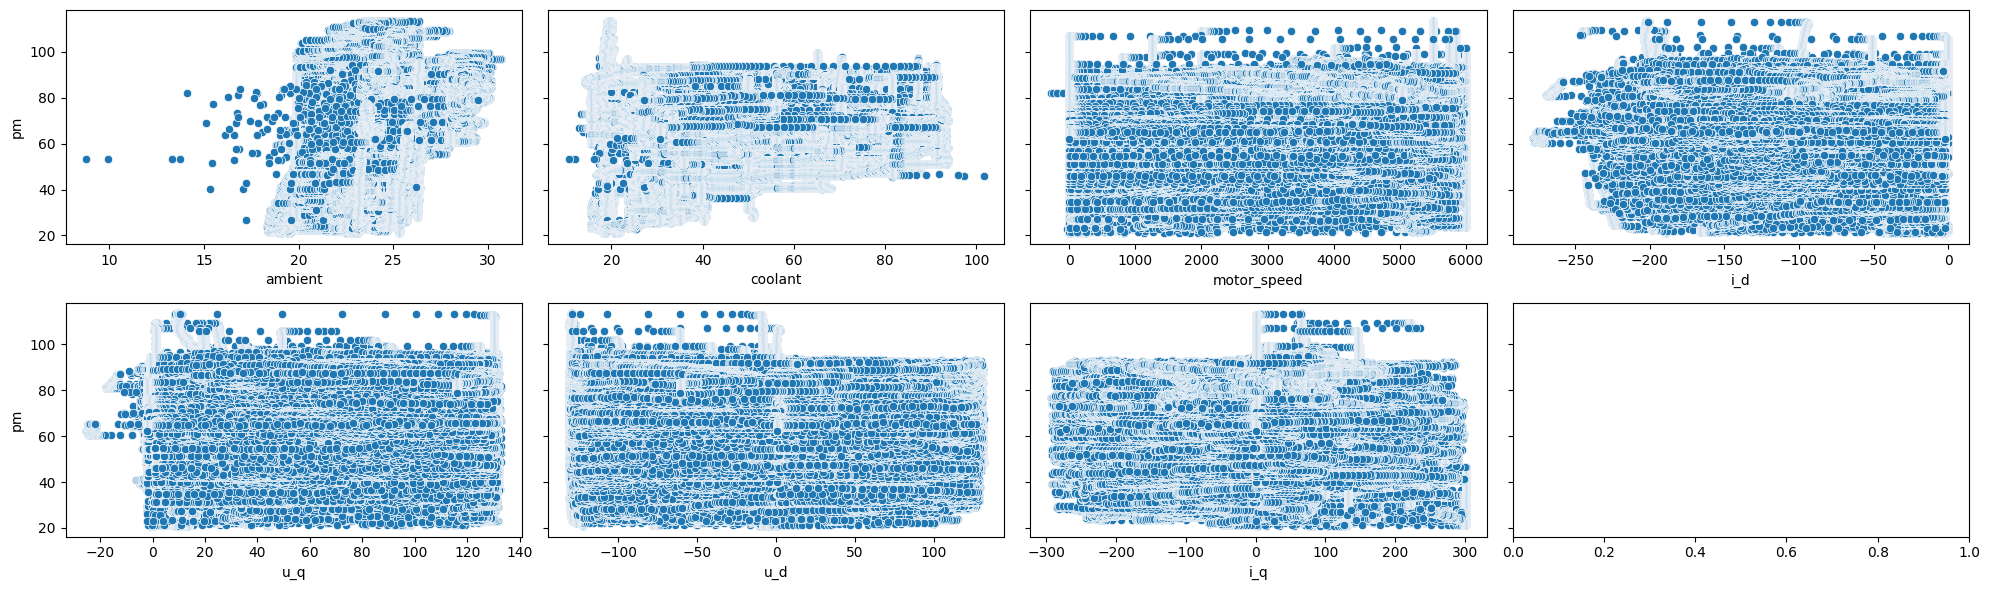

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(20,6), sharey=True)

sns.scatterplot(x=df['ambient'], y=df['pm'], ax=axes[0,0])
sns.scatterplot(x=df['coolant'], y=df['pm'], ax=axes[0,1])
sns.scatterplot(x=df['motor_speed'], y=df['pm'], ax=axes[0,2])
sns.scatterplot(x=df['i_d'], y=df['pm'], ax=axes[0,3])

sns.scatterplot(x=df['u_q'], y=df['pm'], ax=axes[1,0])
sns.scatterplot(x=df['u_d'], y=df['pm'], ax=axes[1,1])
sns.scatterplot(x=df['i_q'], y=df['pm'], ax=axes[1,2])

plt.tight_layout()
plt.show()

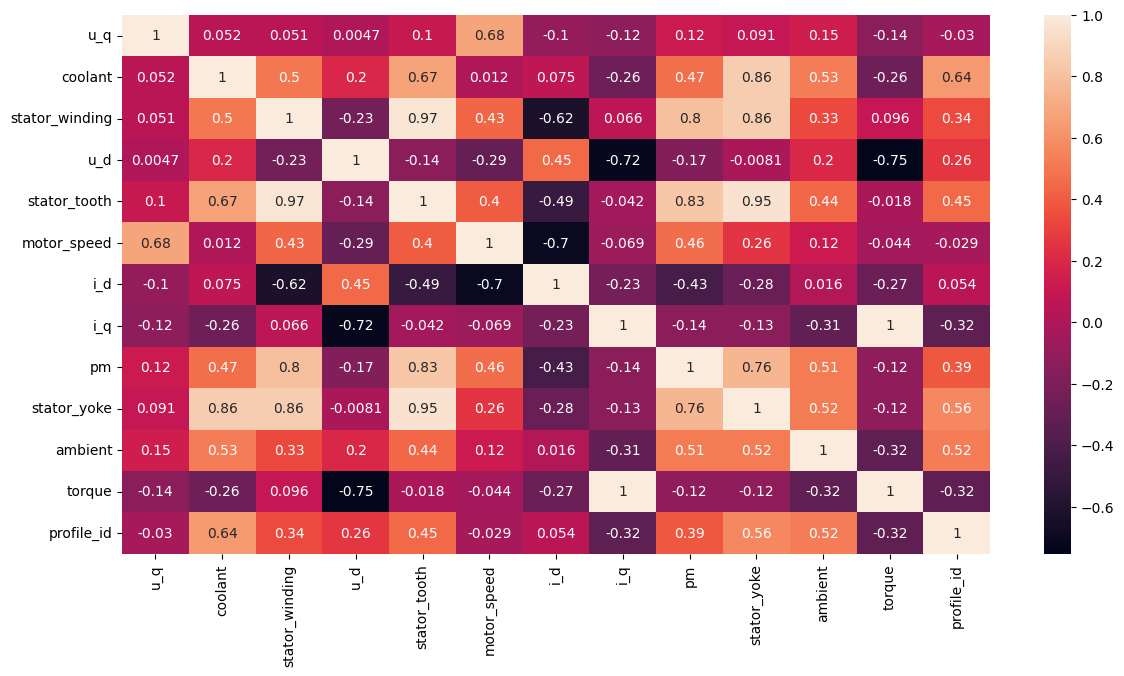

In [7]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True);

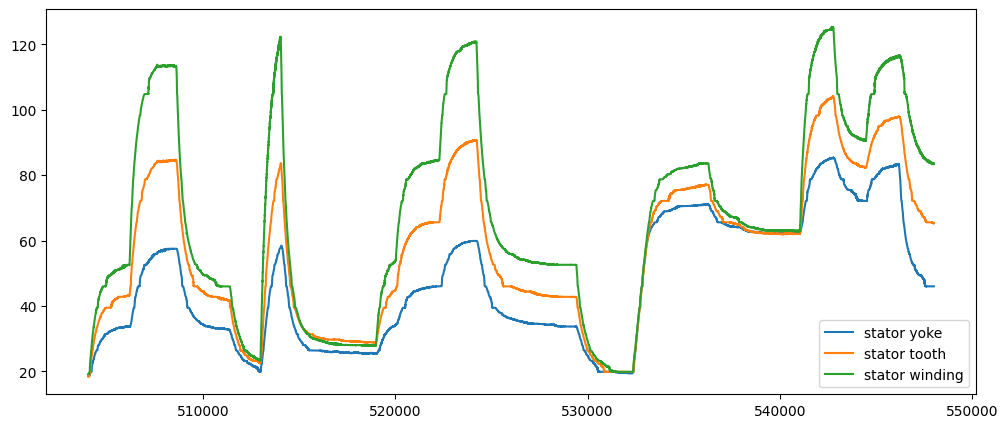

In [8]:
plt.figure(figsize=(12, 5))

df[df['profile_id'] == 20]['stator_yoke'].plot(label='stator yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label='stator tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label='stator winding')

plt.legend()
plt.show()

In [12]:
df.drop(columns=['profile_id'], inplace=True, errors='ignore')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
dtypes: float64(12)
memory usage: 121.8 MB


In [14]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02


In [15]:
df.drop(
    columns=['stator_yoke', 'stator_tooth', 'stator_winding', 'torque'],
    inplace=True,
    errors='ignore'
)

In [16]:
df.isnull().sum()

u_q            0
coolant        0
u_d            0
motor_speed    0
i_d            0
i_q            0
pm             0
ambient        0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Feature columns
feature_cols = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q']

# Target
target = 'pm'

# Split features and target
X = df[feature_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

# Convert to DataFrame
X_train = pd.DataFrame(X_train, columns=feature_cols)
X_test = pd.DataFrame(X_test, columns=feature_cols)

# Reset index
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


In [21]:
import joblib
joblib.dump(mm, 'transform.save')

['transform.save']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

In [28]:
# Linear Regression
lr = LinearRegression(n_jobs=-1)

# Decision Tree (limited depth)
dr = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=20,
    random_state=42
)

# Random Forest (parallel & reduced)
rf = RandomForestRegressor(
    n_estimators=30,
    max_depth=15,
    min_samples_split=20,
    n_jobs=-1,
    random_state=42
)

# ⚡ FAST Linear SVM
svm = LinearSVR(
    max_iter=2000,
    tol=1e-3,
    random_state=42
)

In [30]:
import time

# ---------- Linear Regression ----------
print("Training Linear Regression...")
start = time.time()
lr.fit(X_train, y_train)
print(f"✅ Linear Regression training completed in {time.time() - start:.2f} seconds\n")

# ---------- Decision Tree ----------
print("Training Decision Tree...")
start = time.time()
dr.fit(X_train, y_train)
print(f"✅ Decision Tree training completed in {time.time() - start:.2f} seconds\n")

# ---------- Random Forest ----------
print("Training Random Forest...")
start = time.time()
rf.fit(X_train, y_train)
print(f"✅ Random Forest training completed in {time.time() - start:.2f} seconds\n")

# ---------- Linear SVM (sampled data) ----------
print("Training Linear SVM (sampled data)...")
start = time.time()

X_svm = X_train.sample(50_000, random_state=42)
y_svm = y_train.loc[X_svm.index]

svm.fit(X_svm, y_svm)

print(f"✅ Linear SVM training completed in {time.time() - start:.2f} seconds\n")

print("🎉 ALL MODELS TRAINED SUCCESSFULLY!")


Training Linear Regression...
✅ Linear Regression training completed in 0.26 seconds

Training Decision Tree...
✅ Decision Tree training completed in 17.71 seconds

Training Random Forest...
✅ Random Forest training completed in 33.31 seconds

Training Linear SVM (sampled data)...
✅ Linear SVM training completed in 8.15 seconds

🎉 ALL MODELS TRAINED SUCCESSFULLY!


In [31]:
from sklearn import metrics

In [33]:
# Predictions
p1 = lr.predict(X_test)    # Linear Regression
p2 = dr.predict(X_test)    # Decision Tree
p3 = rf.predict(X_test)    # Random Forest
p4 = svm.predict(X_test)   # Linear SVM

In [34]:
print("Linear Regression R2:", metrics.r2_score(y_test, p1))
print("Decision Tree R2:", metrics.r2_score(y_test, p2))
print("Random Forest R2:", metrics.r2_score(y_test, p3))
print("Linear SVM R2:", metrics.r2_score(y_test, p4))

Linear Regression R2: 0.6013579842765244
Decision Tree R2: 0.919243177116724
Random Forest R2: 0.9673806140666799
Linear SVM R2: -18.309720288271777


In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
print(mean_squared_error(y_test,p1))

143.5316407067084


In [37]:
import joblib
joblib.dump(dr,"model.save")

['model.save']